# Aim of The Competition
### Predicting Employee Attrition in the Dawn of Recession

### As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,roc_auc_score
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sweetviz

/Users/khushal/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_full=pd.read_csv('train.csv')
test_full=pd.read_csv('test.csv')

In [3]:
train_full.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
test_full.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [5]:
train_full.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [6]:
test_full.isnull().sum()

Id                         0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

## Splitting features as categorical,discrete and continuous:

In [7]:
X_full=train_full.drop(['Attrition'],axis=1)
y=train_full['Attrition']
X_test_full=test_full
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,train_size=0.8, test_size=0.2,
                                                                random_state=0) 
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype !='object']
discrete_feature=[feature for feature in numerical_cols if len(X_train_full[feature].unique())<25]
continuous_feature=[feature for feature in numerical_cols if feature not in discrete_feature+['Id']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

                                                                

In [8]:
X_train.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Id,Age,DistanceFromHome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
1213,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Single,No,1214,29,1,...,3,0,7,1,6,2,1,5,5,1
1258,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Yes,1259,20,11,...,3,0,1,2,1,0,0,0,4,1
619,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,No,620,28,2,...,3,0,5,3,2,2,2,1,4,1
1627,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Yes,1628,29,18,...,3,0,4,3,4,3,0,1,2,1
563,Travel_Rarely,Research & Development,Technical Degree,Female,Research Scientist,Divorced,No,564,30,5,...,3,1,8,3,3,2,2,2,4,1


In [9]:
X_test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Id,Age,DistanceFromHome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,No,1,28,9,...,4,1,5,3,5,2,0,4,5,1
1,Travel_Rarely,Sales,Medical,Male,Sales Executive,Divorced,No,2,31,6,...,4,2,13,4,7,7,5,7,3,1
2,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Divorced,Yes,3,37,6,...,3,2,13,2,7,7,6,7,4,1
3,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes,4,42,1,...,3,1,8,4,4,3,0,2,5,1
4,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No,5,45,4,...,3,0,9,5,9,7,0,8,2,1


In [10]:
numerical_cols

['Id',
 'Age',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'Behaviour']

In [11]:
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [12]:
discrete_feature

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'Behaviour']

In [13]:
continuous_feature


['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']

# EXPLORATORY DATA ANALYSIS:

## Continuous Variables

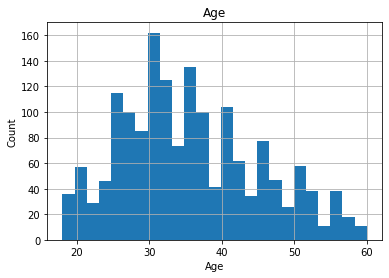

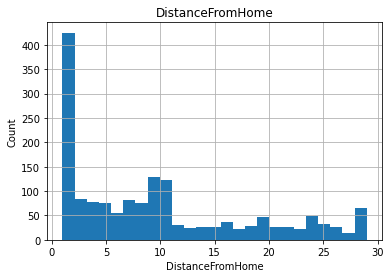

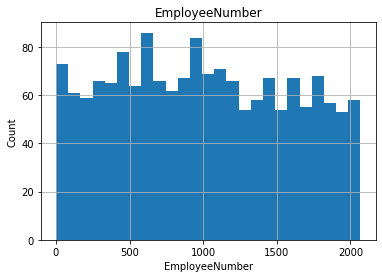

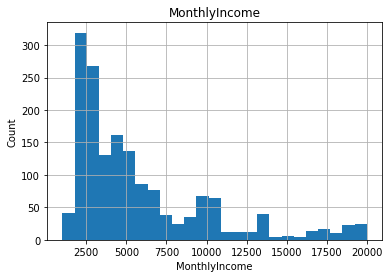

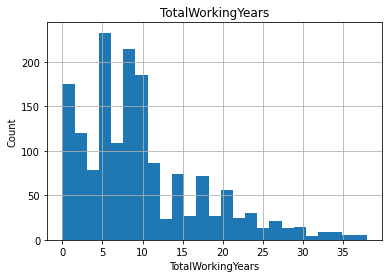

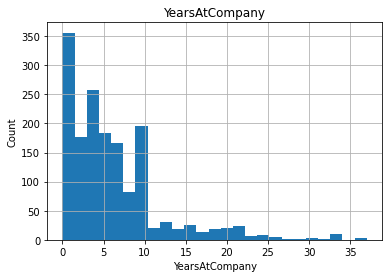

In [14]:
for feature in continuous_feature:
    data=train_full.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## AFTER LOG TRANSFORMATION ON CONTINUOUS VARIABLES

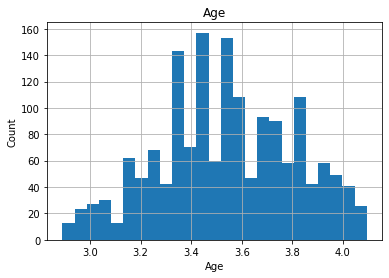

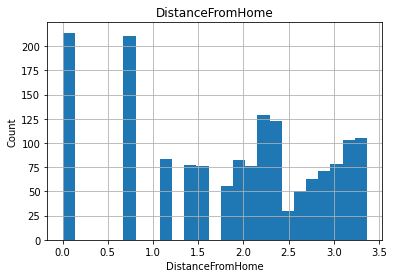

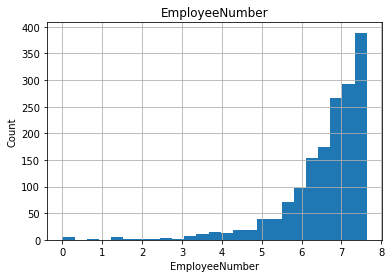

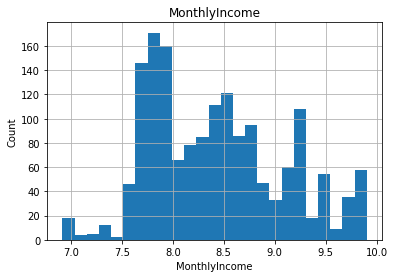

In [15]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

## AFTER SQUARE ROOT TRANSFORMATION ON CONTINUOUS VARIABLES

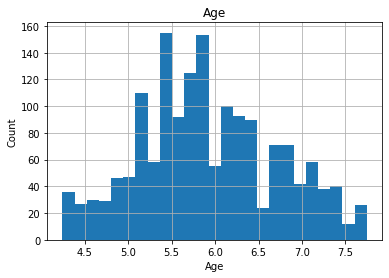

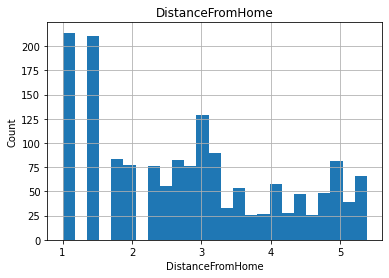

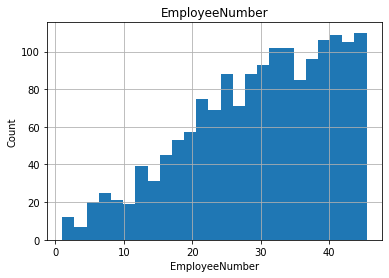

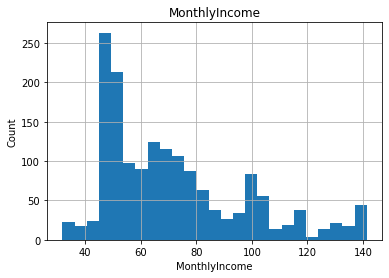

In [16]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.sqrt(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

## OUTLIERS

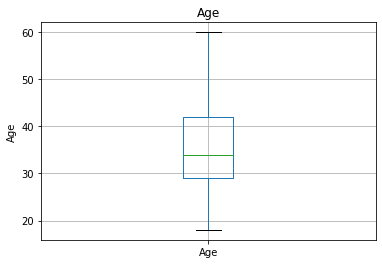

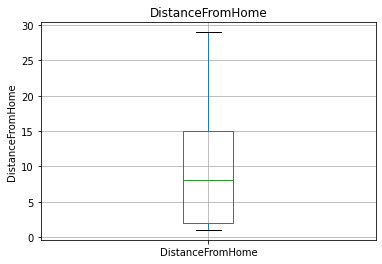

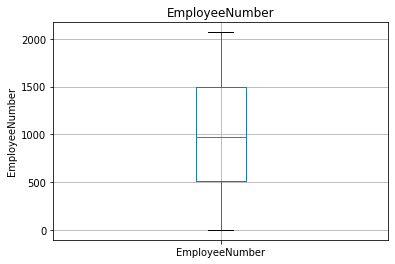

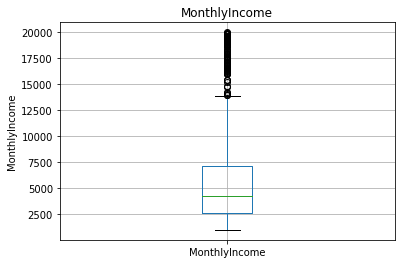

In [17]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## CATEGORICAL VARIABLES

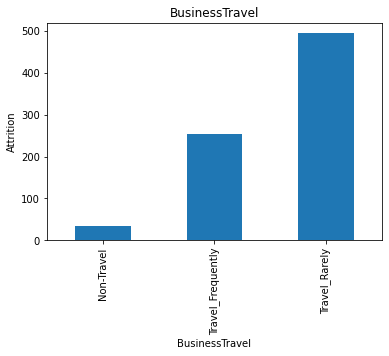

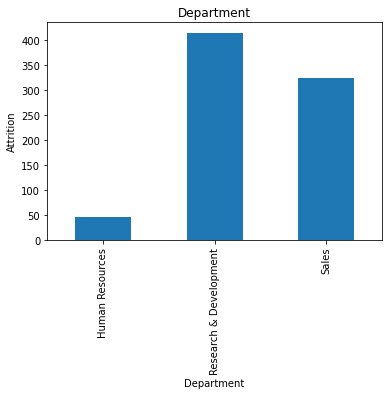

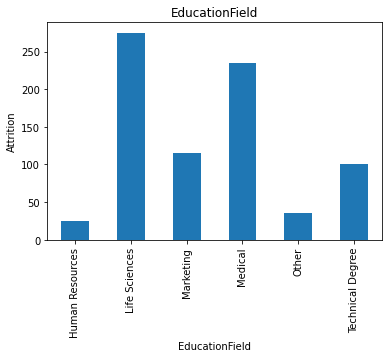

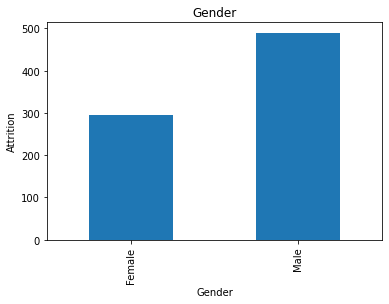

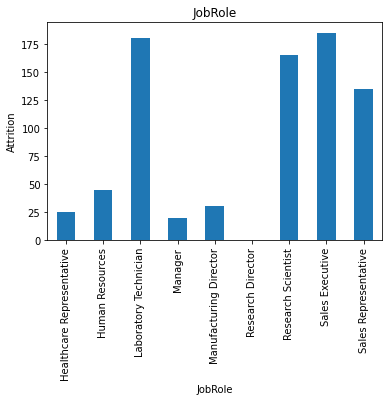

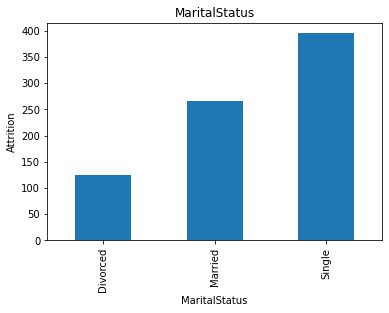

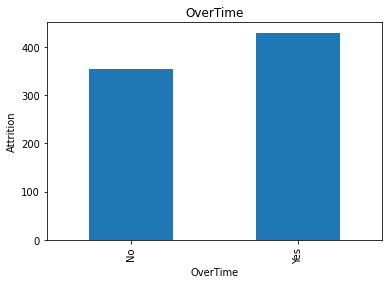

In [18]:
for feature in categorical_cols:
    data=train_full.copy()
    data.groupby(feature)['Attrition'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

## DISCRETE VARIABLES

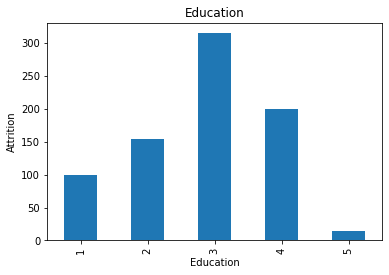

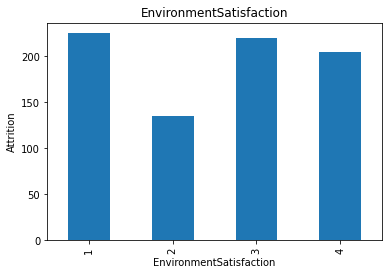

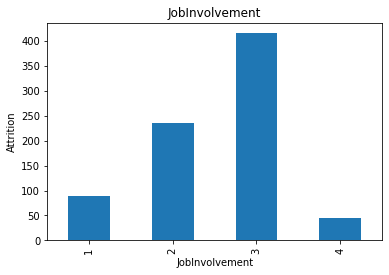

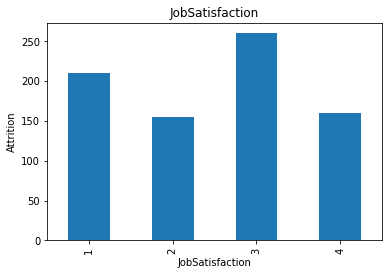

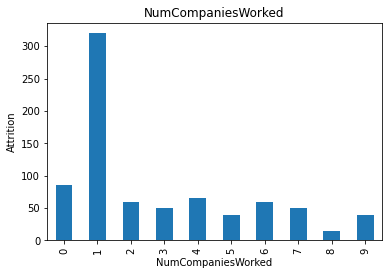

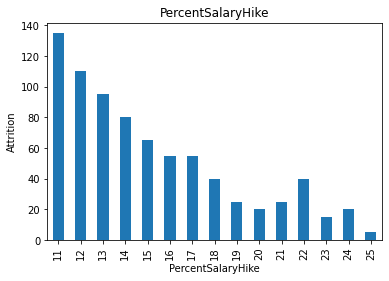

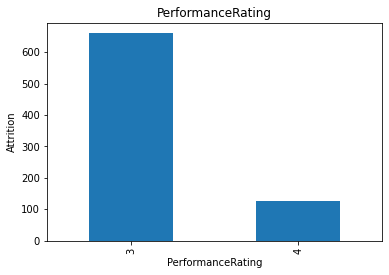

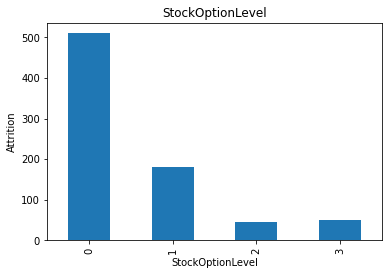

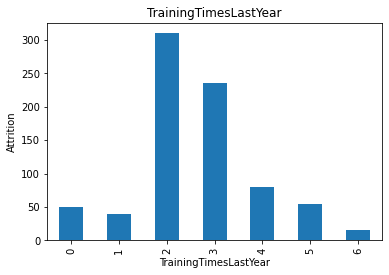

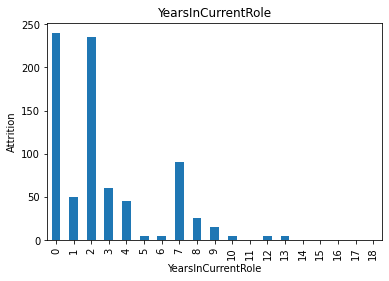

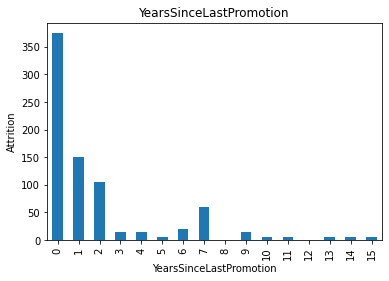

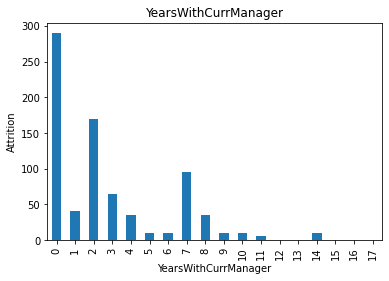

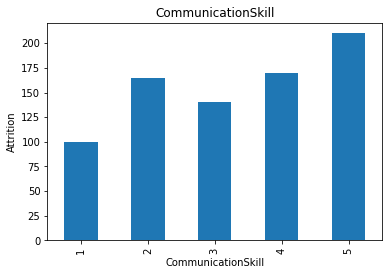

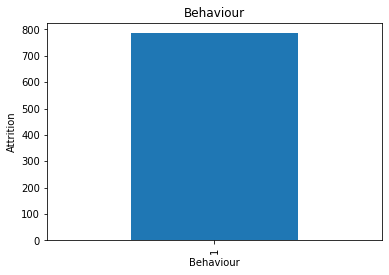

In [19]:
for feature in discrete_feature:
    data=train_full.copy()
    data.groupby(feature)['Attrition'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

## EDA USING SWEETVIZ LIBRARY

In [20]:
my_report=sweetviz.analyze([train_full,'Train'],target_feat='Attrition')
my_report.show_html('Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
my_report1=sweetviz.compare([train_full,'Train'],[test_full,'Test'],'Attrition')
my_report1.show_html('Report1.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


# FEATURE ENGINEERING:

## HANDLING SKEWNESS

In [22]:
skew_features = X_train[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)

In [23]:
skew_features

YearsAtCompany       1.917020
MonthlyIncome        1.553630
TotalWorkingYears    1.159766
DistanceFromHome     0.872473
Age                  0.444934
EmployeeNumber       0.100440
dtype: float64

In [24]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_train[i] = boxcox1p(X_train[i], boxcox_normmax(X_train[i] + 1))

/Users/khushal/Desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [25]:
skew_features = X_train[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features

Age                  0.444934
EmployeeNumber       0.100440
YearsAtCompany       0.067398
DistanceFromHome     0.062882
TotalWorkingYears    0.044056
MonthlyIncome        0.005959
dtype: float64

In [26]:
skew_features = X_valid[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_valid[i] = boxcox1p(X_valid[i], boxcox_normmax(X_valid[i] + 1))

/Users/khushal/Desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [27]:
skew_features = X_test[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_test[i] = boxcox1p(X_test[i], boxcox_normmax(X_test[i] + 1))

## HANDLING CATEGORICAL VARIABLES

In [28]:
for col in categorical_cols:
    col_dummies=pd.get_dummies(X_train[col],prefix=col,drop_first=True )
    X_train=pd.concat((X_train,col_dummies),axis=1)
for col in categorical_cols:
    col_dummies=pd.get_dummies(X_valid[col],prefix=col,drop_first=True )
    X_valid=pd.concat((X_valid,col_dummies),axis=1)
for col in categorical_cols:
    col_dummies=pd.get_dummies(X_test[col],prefix=col,drop_first=True )
    X_test=pd.concat((X_test,col_dummies),axis=1)

In [29]:
X_train

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Id,Age,DistanceFromHome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1213,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Single,No,1214,29,0.735880,...,0,0,0,0,1,0,0,0,1,0
1258,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Yes,1259,20,3.096006,...,0,0,0,0,1,0,0,0,1,1
619,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,No,620,28,1.208536,...,0,0,0,0,1,0,0,0,1,0
1627,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Yes,1628,29,3.827058,...,0,0,0,0,1,0,0,0,1,1
563,Travel_Rarely,Research & Development,Technical Degree,Female,Research Scientist,Divorced,No,564,30,2.096429,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Non-Travel,Research & Development,Technical Degree,Male,Research Scientist,Married,No,764,47,3.443828,...,0,0,0,0,1,0,0,1,0,0
835,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,No,836,38,0.735880,...,0,0,0,0,1,0,0,0,1,0
1216,Non-Travel,Sales,Medical,Male,Sales Executive,Single,No,1217,26,4.612885,...,0,0,0,0,0,1,0,0,1,0
559,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Yes,560,32,3.644811,...,0,0,0,0,1,0,0,0,1,1


In [30]:
X_test

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Id,Age,DistanceFromHome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,No,1,28,2.710563,...,0,0,0,0,1,0,0,1,0,0
1,Travel_Rarely,Sales,Medical,Male,Sales Executive,Divorced,No,2,31,2.232308,...,0,0,0,0,0,1,0,0,0,0
2,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Divorced,Yes,3,37,2.232308,...,0,0,0,0,1,0,0,0,0,1
3,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes,4,42,0.727390,...,0,0,1,0,0,0,0,1,0,1
4,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No,5,45,1.802221,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No,466,32,1.186288,...,1,0,0,0,0,0,0,0,1,0
466,Travel_Frequently,Sales,Medical,Female,Sales Representative,Single,Yes,467,18,1.527814,...,0,0,0,0,0,0,1,0,1,1
467,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Yes,468,24,3.989299,...,0,0,0,0,1,0,0,1,0,1
468,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,469,31,3.989299,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X_valid

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Id,Age,DistanceFromHome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1197,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Married,No,1198,46,2.948423,...,0,0,0,0,0,1,0,1,0,0
587,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Divorced,No,588,27,1.205733,...,1,0,0,0,0,0,0,0,0,0
602,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Married,No,603,24,4.119404,...,0,0,0,0,0,0,0,1,0,0
527,Travel_Rarely,Research & Development,Medical,Male,Research Director,Married,No,528,42,2.298909,...,0,0,0,1,0,0,0,1,0,0
76,Travel_Rarely,Sales,Marketing,Female,Manager,Married,No,77,51,4.393591,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Travel_Frequently,Sales,Marketing,Male,Sales Executive,Single,No,433,33,2.948423,...,0,0,0,0,0,1,0,0,1,0
638,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Married,No,639,35,3.622031,...,0,0,0,0,0,1,0,1,0,0
1413,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Yes,1414,38,4.577793,...,0,0,0,0,0,0,0,1,0,1
829,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Yes,830,38,4.577793,...,0,0,0,0,0,0,0,1,0,1


In [32]:
for col in categorical_cols:
    X_train.drop(col,axis=1,inplace=True)
for col in categorical_cols:
    X_valid.drop(col,axis=1,inplace=True)
for col in categorical_cols:
    X_test.drop(col,axis=1,inplace=True)



In [33]:
X_train

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1213,1214,29,0.735880,3,300,3,3,3,2.650448,0,...,0,0,0,0,1,0,0,0,1,0
1258,1259,20,3.096006,3,1016,4,2,1,2.665803,1,...,0,0,0,0,1,0,0,0,1,1
619,620,28,1.208536,4,828,3,3,3,2.695863,6,...,0,0,0,0,1,0,0,0,1,0
1627,1628,29,3.827058,1,315,3,2,4,2.660388,1,...,0,0,0,0,1,0,0,0,1,1
563,564,30,2.096429,3,197,4,3,1,2.678497,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,47,3.443828,4,1934,3,3,2,2.707032,8,...,0,0,0,0,1,0,0,1,0,0
835,836,38,0.735880,1,662,3,3,1,2.666261,3,...,0,0,0,0,1,0,0,0,1,0
1216,1217,26,4.612885,2,1037,2,1,1,2.702316,8,...,0,0,0,0,0,1,0,0,1,0
559,560,32,3.644811,1,33,2,1,1,2.689887,1,...,0,0,0,0,1,0,0,0,1,1


In [34]:
X_train_new1=X_train.copy()
X_valid_new1=X_valid.copy()
X_test_new1=X_test.copy()

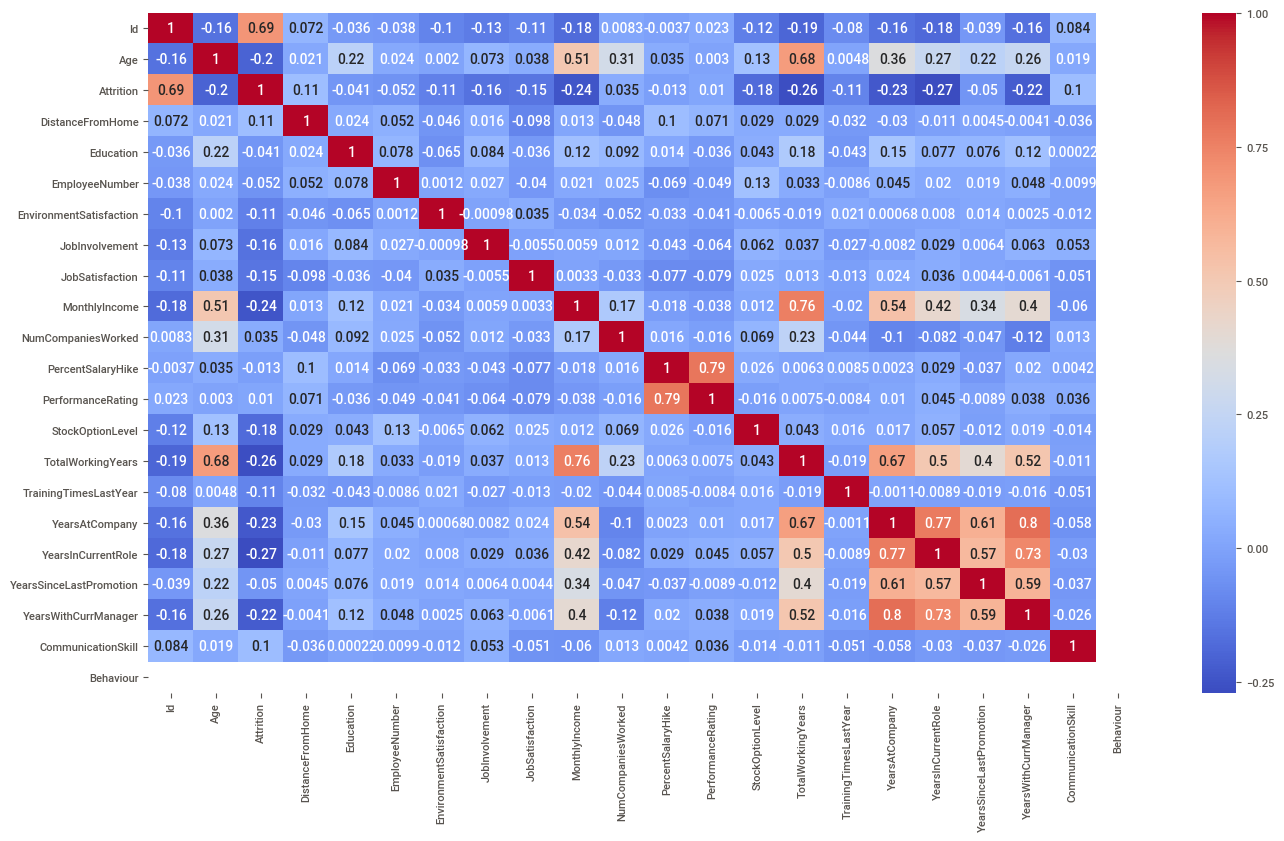

In [35]:
plt.figure(figsize=(16,9))
sns.heatmap(data=train_full.corr(),annot=True,cmap='coolwarm')
plt.show()

In [36]:
X_train.drop('Id',axis=1,inplace=True)
X_valid.drop('Id',axis=1,inplace=True)
X_test.drop('Id',axis=1,inplace=True)

In [37]:
X_train_new=X_train.drop(columns=['Education','EmployeeNumber','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','EnvironmentSatisfaction','JobInvolvement','StockOptionLevel','TrainingTimesLastYear','CommunicationSkill'],axis=1)
X_valid_new=X_valid.drop(columns=['Education','EmployeeNumber','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','EnvironmentSatisfaction','JobInvolvement','StockOptionLevel','TrainingTimesLastYear','CommunicationSkill'],axis=1)
X_test_new=X_test.drop(columns=['Education','EmployeeNumber','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','EnvironmentSatisfaction','JobInvolvement','StockOptionLevel','TrainingTimesLastYear','CommunicationSkill'],axis=1)

In [38]:
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [39]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_

In [40]:
X_test.shape

(470, 41)

In [41]:
X_train_new.shape

(1302, 30)

# TRAINING MODEL: 

In [42]:
xgb=XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)
pred_val_prob=xgb.predict_proba(X_valid)[:,1]
pred_test_prob=xgb.predict_proba(X_test)[:,1]
pred_val=xgb.predict(X_valid)
pred_test=xgb.predict(X_test)
cm=confusion_matrix(np.square(y_valid),np.square(pred_val))
print(cm)
tn,fp,fn,tp=confusion_matrix(np.square(y_valid),np.square(pred_val)).ravel()
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(tn+fp)
sen=tp/(tp+fn)
spe=tn/(tn+fp)
acc=(tp+tn)/(tp+tn+fp+fn)
print(acc)
roc_auc_score(y_valid,pred_val)



[[158   3]
 [ 87  78]]
0.7239263803680982


0.7270468661773009

In [43]:
pred_test_prob=pd.DataFrame(pred_test_prob)

In [44]:
pred_test_prob

,0
0,0.037927
1,0.028451
2,0.094553
3,0.143086
4,0.020476
...,...
465,0.225527
466,0.562910
467,0.278265
468,0.061524


In [45]:
submission=pd.concat((test_full['Id'],pred_test_prob),axis=1)

In [46]:
submission.columns=['Id','Attrition']
submission

,Id,Attrition
0,1,0.037927
1,2,0.028451
2,3,0.094553
3,4,0.143086
4,5,0.020476
...,...,...
465,466,0.225527
466,467,0.562910
467,468,0.278265
468,469,0.061524


In [47]:
submission.to_csv("submission.csv", index=False)

# HYPERPARAMETER TUNING:

In [48]:
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],'n_estimators':[50,100,150,200] }

random_search=RandomizedSearchCV(estimator=xgb,param_distributions=params,scoring='roc_auc',cv=5,random_state=5)
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=1, reg_alpha=0...
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                        

In [49]:
random_search.best_params_

{'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [50]:
xgbc=XGBClassifier(min_child_weight=1,max_depth=12,learning_rate=0.25,gamma=0.3,colsample_bytree=0.3,n_estimators=200)
xgbc.fit(X_train,y_train)
prediction_valid=xgbc.predict(X_valid)
prediction_test=xgbc.predict(X_test)
prediction_valid_prob=xgbc.predict_proba(X_valid)[:,1]
prediction_test_prob=xgbc.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_valid,prediction_valid)
print(cm)
tn,fp,fn,tp=confusion_matrix(y_valid,prediction_valid).ravel()
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(tn+fp)
sen=tp/(tp+fn)
spe=tn/(tn+fp)
acc=(tp+tn)/(tp+tn+fp+fn)
print(acc)
roc_auc_score(y_valid,prediction_valid)


[[159   2]
 [ 14 151]]
0.950920245398773


0.9513645774515339

In [51]:
prediction_test_prob=pd.DataFrame(prediction_test_prob)
submission2=pd.concat((test_full['Id'],prediction_test_prob),axis=1)
submission2.columns=['Id','Attrition']


In [52]:
submission2

,Id,Attrition
0,1,0.003508
1,2,0.015519
2,3,0.044436
3,4,0.038300
4,5,0.002183
...,...,...
465,466,0.133592
466,467,0.746590
467,468,0.051578
468,469,0.011526


In [53]:
submission2.to_csv("submission2.csv", index=False)